# Extraction of Collocated ESA CCI Biomass and Sentinel-2 NDVI

In [1]:
import os

# define repo name and get root working directory
repo = 'byoc'
root_path = os.getcwd()[ 0 : os.getcwd().find( repo ) + len ( repo )]
root_path

'C:\\Users\\crwil\\Documents\\GitHub\\sentinelhub\\apis\\byoc'

In [2]:
# get pathname to configuration file
cfg_file = os.path.join( os.path.join( root_path, 'cfg' ), 'fusion/s2-agb.yml' )
with open( cfg_file ) as f:
    print ( f.read() )

request:
    evalscript: |
                //VERSION=3
                function setup() {
                    return {
                        input: [{
                            datasource: "byoc",
                            bands: [ "agb", "agb_sd" ]
                        },
                        {
                            datasource: "s2_l2a",
                            bands: [ "B04", "B08", "SCL" ],
                        } ],
                        output: [
                            {id: "AGB", bands: 1, sampleType: SampleType.UINT16},
                            {id: "AGB_SD", bands: 1, sampleType: SampleType.UINT16},
                            {id: "NDVI", bands: 1, sampleType: SampleType.FLOAT32} 
                        ]
                    }
                }
                function evaluatePixel(samples) {                                  
                    
                    var byoc = samples.byoc[0]
                    var s2 = samples.s2_l2a[0]
  

In [3]:
import yaml
from munch import munchify

# load cfg file using yaml parser
with open( cfg_file, 'r' ) as f:
    config = munchify( yaml.safe_load( f ) )

### _Arbitrary location of a land parcel somewhere in southwest Kenya_

In [4]:
# setup aoi limits and resolution
coords = 35, -0.9, 36, 0.0
resolution = 100

In [5]:
# create instance of shclient class
from processapi import Client
client = Client( config )

In [6]:
# get utm bbox
bbox = client.getBoundingBox( coords )
print ( bbox, bbox.crs.value )

722568.1399615373,9900461.841652302,833978.5569194595,10000000.0 32736


In [7]:
# get aoi image dimensions
client.getBoxDimensions( bbox, resolution )

(1114, 995)

### _Define and extract biomass + S2 time-series for autumn 2018_

In [8]:
# pick a few dates
from datetime import datetime
timeframe = { 'start' : datetime( 2018, 9, 1, 0, 0, 0 ), 
                'end' : datetime( 2018, 11, 7, 23, 59, 59 ) }
timeframe

{'start': datetime.datetime(2018, 9, 1, 0, 0),
 'end': datetime.datetime(2018, 11, 7, 23, 59, 59)}

In [9]:
# get time series
response = client.getTimeSeries ( bbox, timeframe, resolution )
response._df

AGB.tif  \
0   [[10, 20, 13, 21, 17, 23, 21, 14, 7, 2, 5, 6, ...   
1   [[10, 20, 13, 21, 17, 23, 21, 14, 7, 2, 5, 6, ...   
2   [[10, 20, 13, 21, 17, 23, 21, 14, 7, 2, 5, 6, ...   
3   [[10, 20, 13, 21, 17, 23, 21, 14, 7, 2, 5, 6, ...   
4   [[10, 20, 13, 21, 17, 23, 21, 14, 7, 2, 5, 6, ...   
5   [[10, 20, 13, 21, 17, 23, 21, 14, 7, 2, 5, 6, ...   
6   [[10, 20, 13, 21, 17, 23, 21, 14, 7, 2, 5, 6, ...   
7   [[10, 20, 13, 21, 17, 23, 21, 14, 7, 2, 5, 6, ...   
8   [[10, 20, 13, 21, 17, 23, 21, 14, 7, 2, 5, 6, ...   
9   [[10, 20, 13, 21, 17, 23, 21, 14, 7, 2, 5, 6, ...   
10  [[10, 20, 13, 21, 17, 23, 21, 14, 7, 2, 5, 6, ...   
11  [[10, 20, 13, 21, 17, 23, 21, 14, 7, 2, 5, 6, ...   
12  [[10, 20, 13, 21, 17, 23, 21, 14, 7, 2, 5, 6, ...   

                                           AGB_SD.tif  \
0   [[12, 25, 17, 24, 20, 25, 21, 14, 8, 5, 11, 14...   
1   [[12, 25, 17, 24, 20, 25, 21, 14, 8, 5, 11, 14...   
2   [[12, 25, 17, 24, 20, 25, 21, 14, 8, 5, 11, 14...   
3   [[12, 25, 17, 24, 20, 25, 21, 14, 8, 5, 11, 14...   
4   [[12, 25, 17, 24, 20, 25, 21, 14, 8, 5, 11, 14...   
5   [[12, 25, 17, 24, 20, 25, 21, 14, 8, 5, 11, 14...   
6   [[12, 25, 17, 24, 20, 25, 21, 14, 8, 5, 11, 14...   
7   [[12, 25, 17, 24, 20, 25, 21, 14, 8, 5, 11, 14...   
8   [[12, 25, 17, 24, 20, 25, 21, 14, 8, 5, 11, 14...   
9   [[12, 25, 17, 24, 20, 25, 21, 14, 8, 5, 11, 14...   
10  [[12, 25, 17, 24, 20, 25, 21, 14, 8, 5, 11, 14...   
11  [[12, 25, 17, 24, 20, 25, 21, 14, 8, 5, 11, 14...   
12  [[12, 25, 17, 24, 20, 25, 21, 14, 8, 5, 11, 14...   

                                             NDVI.tif  \
0   [[0.6646091, 0.7341289, 0.71528536, 0.7957665,...   
1   [[-99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -9...   
2   [[0.65614223, 0.7118524, 0.68375134, 0.7615437...   
3   [[-99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -9...   
4   [[0.6055199, 0.66292137, 0.66178864, 0.7301302...   
5   [[-99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -9...   
6   [[0.6431322, 0.69455385, 0.6587823, 0.7685404,...   
7   [[-99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -9...   
8   [[-99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -9...   
9   [[0.6200485, 0.65899926, 0.6101033, 0.7373047,...   
10  [[-99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -9...   
11  [[0.5905999, 0.58240396, 0.5998623, 0.6905444,...   
12  [[-99.0, -99.0, -99.0, -99.0, -99.0, -99.0, -9...   

                        time  
0  2018-09-09 08:07:44+00:00  
1  2018-09-11 07:55:23+00:00  
2  2018-09-14 08:01:59+00:00  
3  2018-09-16 07:52:57+00:00  
4  2018-09-19 08:04:34+00:00  
5  2018-09-21 07:57:28+00:00  
6  2018-09-24 08:02:13+00:00  
7  2018-09-26 07:59:38+00:00  
8  2018-10-01 07:54:14+00:00  
9  2018-10-04 07:52:16+00:00  
10 2018-10-06 08:00:03+00:00  
11 2018-10-09 08:03:37+00:00  
12 2018-10-16 07:52:55+00:00

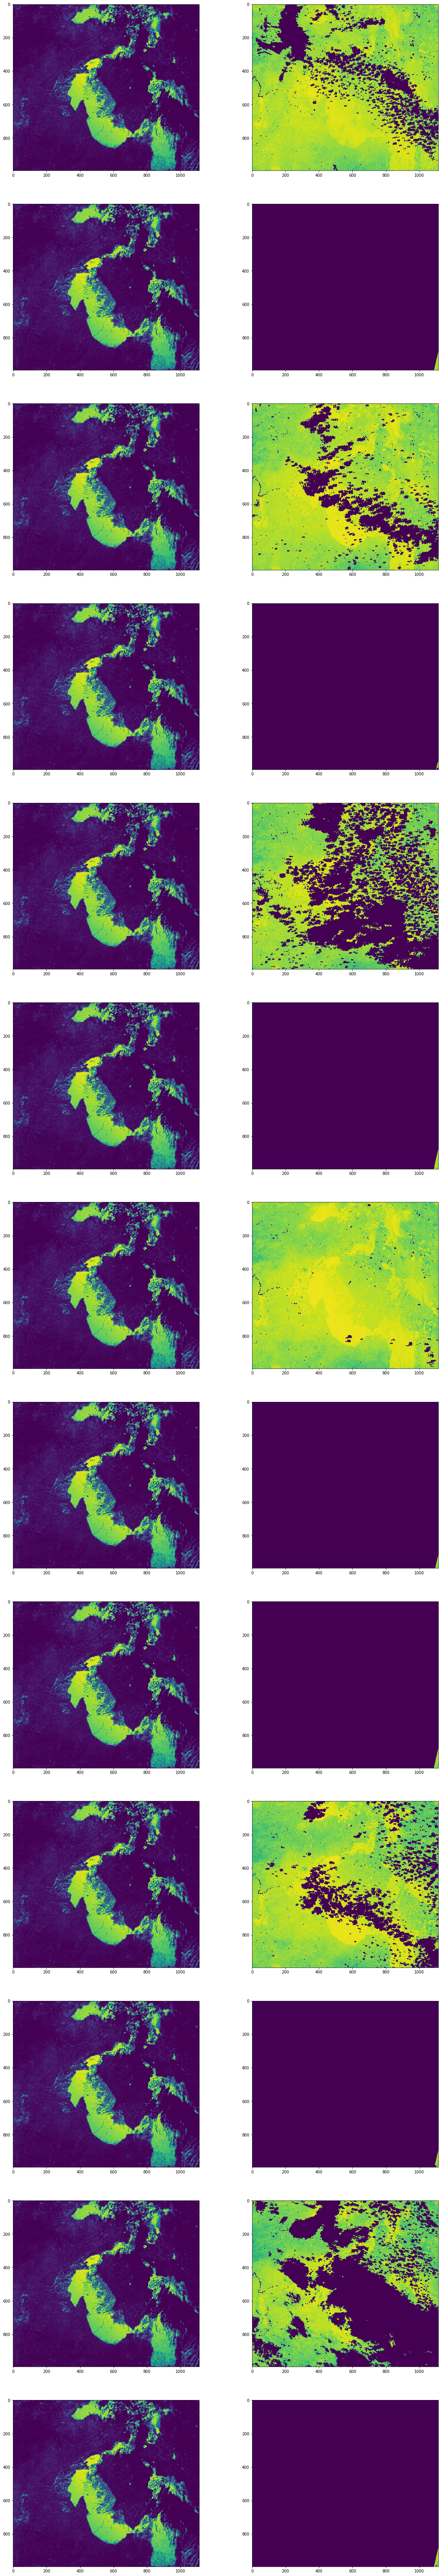

In [10]:
import matplotlib.pyplot as plt

_, axes = plt.subplots( nrows=len(response._df), ncols=2, figsize=(20,120) )

for idx, row in response._df.iterrows():
    axes[ idx ][ 0 ].imshow( row[ 'AGB.tif'] )
    axes[ idx ][ 1 ].imshow( row[ 'NDVI.tif'], vmin=-1.0 )